# __1. Import Packages__

In [22]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
raw_data = pd.read_csv('./50_Startups.csv')

# __2. Dataset Overview__

### __2.1 Top 5 Rows__

In [24]:
raw_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### __2.2 Shape of the data__

In [25]:
raw_data.shape

(50, 5)

### __2.3 Dataset Basic Information:__

In [26]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### __2.4 Descriptions of Numerical Column:__

In [27]:
raw_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### __Data Description__

__The data collected from New York, California and Florida about 50 business Startups. The independent variables used in this dataset are R&D spending, Administration and Marketing Spending.
The dependent variable is Profit.__

## __3. Exploratory Data Analysis__

- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features

In [28]:
data = raw_data.copy(deep=True)

In [ ]:
# splitting columns into object and numbers
numcols = data.select_dtypes(np.number)
objcols = data.select_dtypes(include=['object'])

In [72]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

### __3.1 Missing values__

In [30]:
# missing values

data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

###  __3.2 Duplicated Values__

In [31]:
# duplicated values

data.duplicated().any()

False

### __3.3 Finding outliers in the dataset__

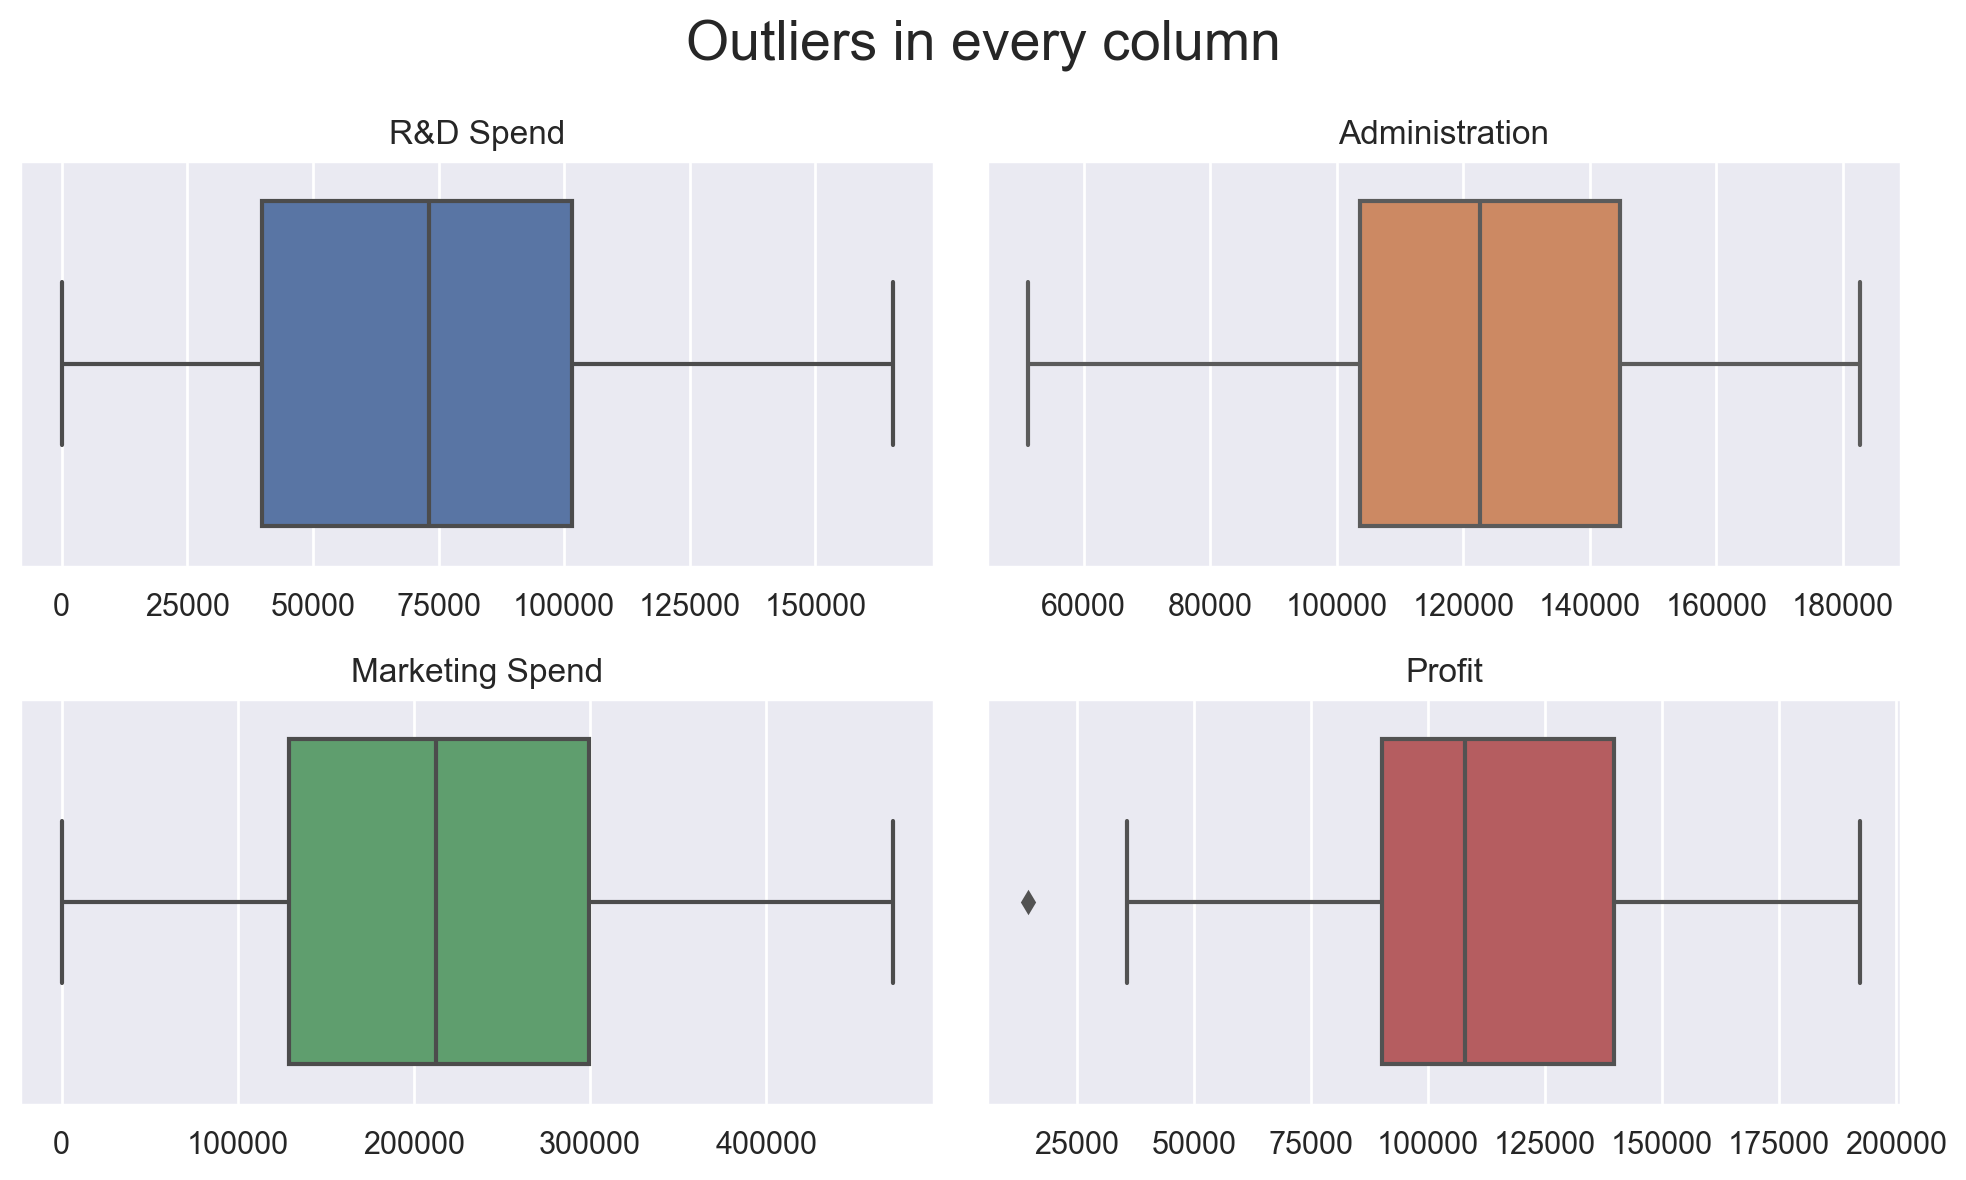

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6), dpi=200)
axes = axes.flat
for index, column in enumerate(numcols):
    graph = sns.boxplot(
        data=data, 
        x=column, 
        color=(list(plt.rcParams['axes.prop_cycle']))[index]['color'],
        ax=axes[index]
)
    axes[index].set_title(column, size=12)
    axes[index].set_xlabel('')
plt.suptitle('Outliers in every column', fontsize=20)
plt.tight_layout()


### __3.4 Skewness of Continuous Variables__

Skewness of R&D Spend: 0.164002172321177
Skewness of Administration: -0.4890248099671768
Skewness of Marketing Spend: -0.04647226758360412
Skewness of Profit: 0.023291019769116614


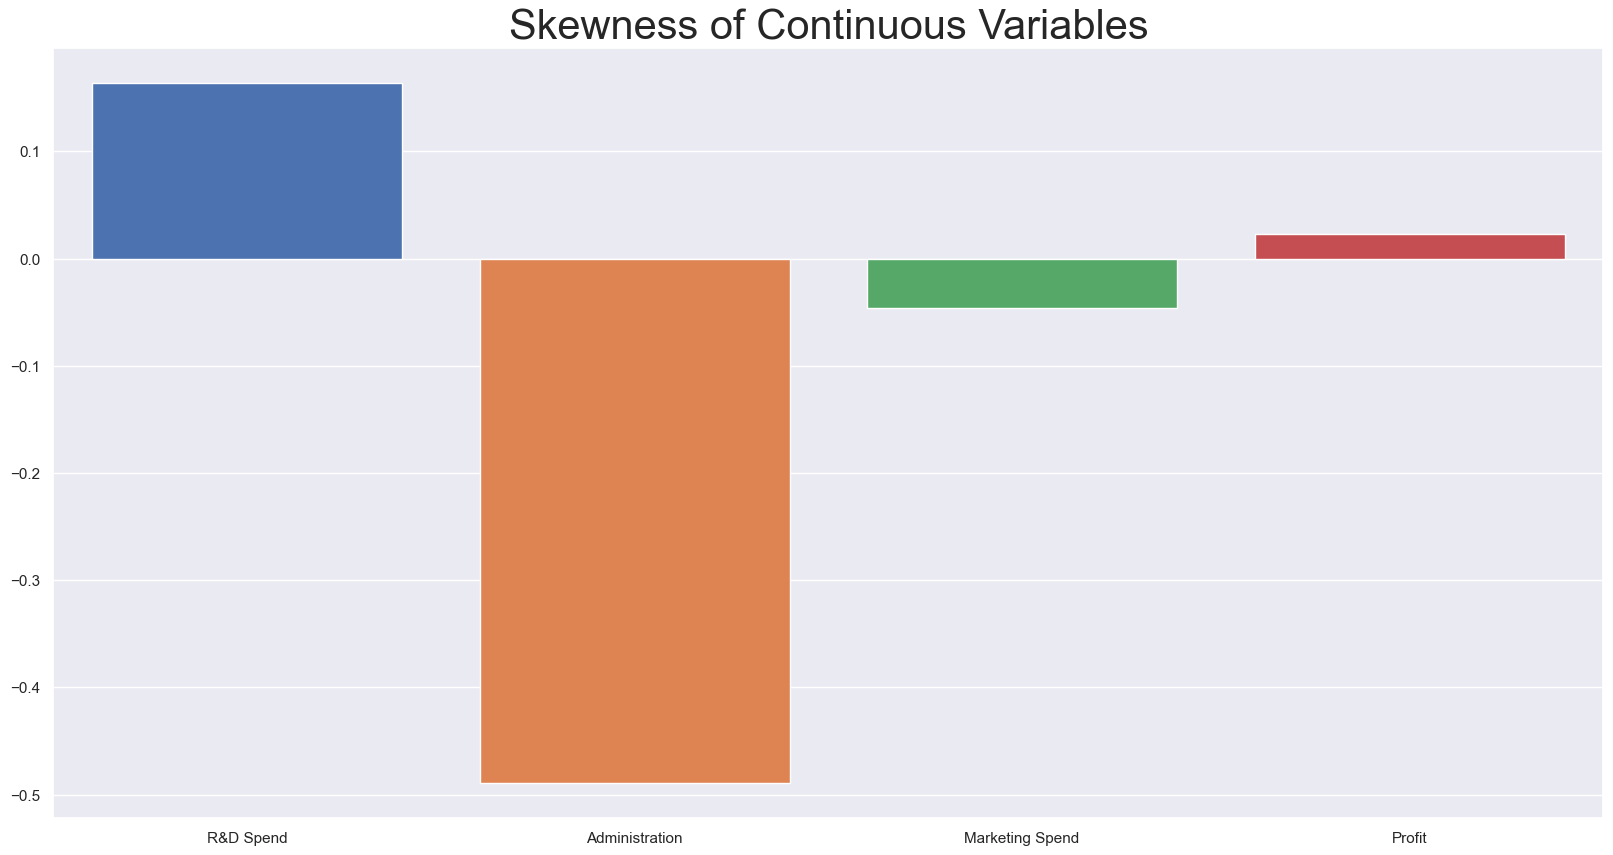

In [64]:
plt.figure(figsize=(20,10))
skew = {}
for col in data.columns:
    if col!="State":
        skewness = data[col].skew()
        print(f"Skewness of {col}: {skewness}")
        skew[col]=skewness
sns.barplot(x=list(skew.keys()), y=list(skew.values()), saturation=2)
plt.title("Skewness of Continuous Variables", fontsize=30)
plt.show()

### __3.5 Kurtosis of continuos variables__

Kurtosis of R&D Spend: -0.7614645568424674
Kurtosis of Administration: 0.22507113536865386
Kurtosis of Marketing Spend: -0.6717011281297514
Kurtosis of Profit: -0.06385888546853113


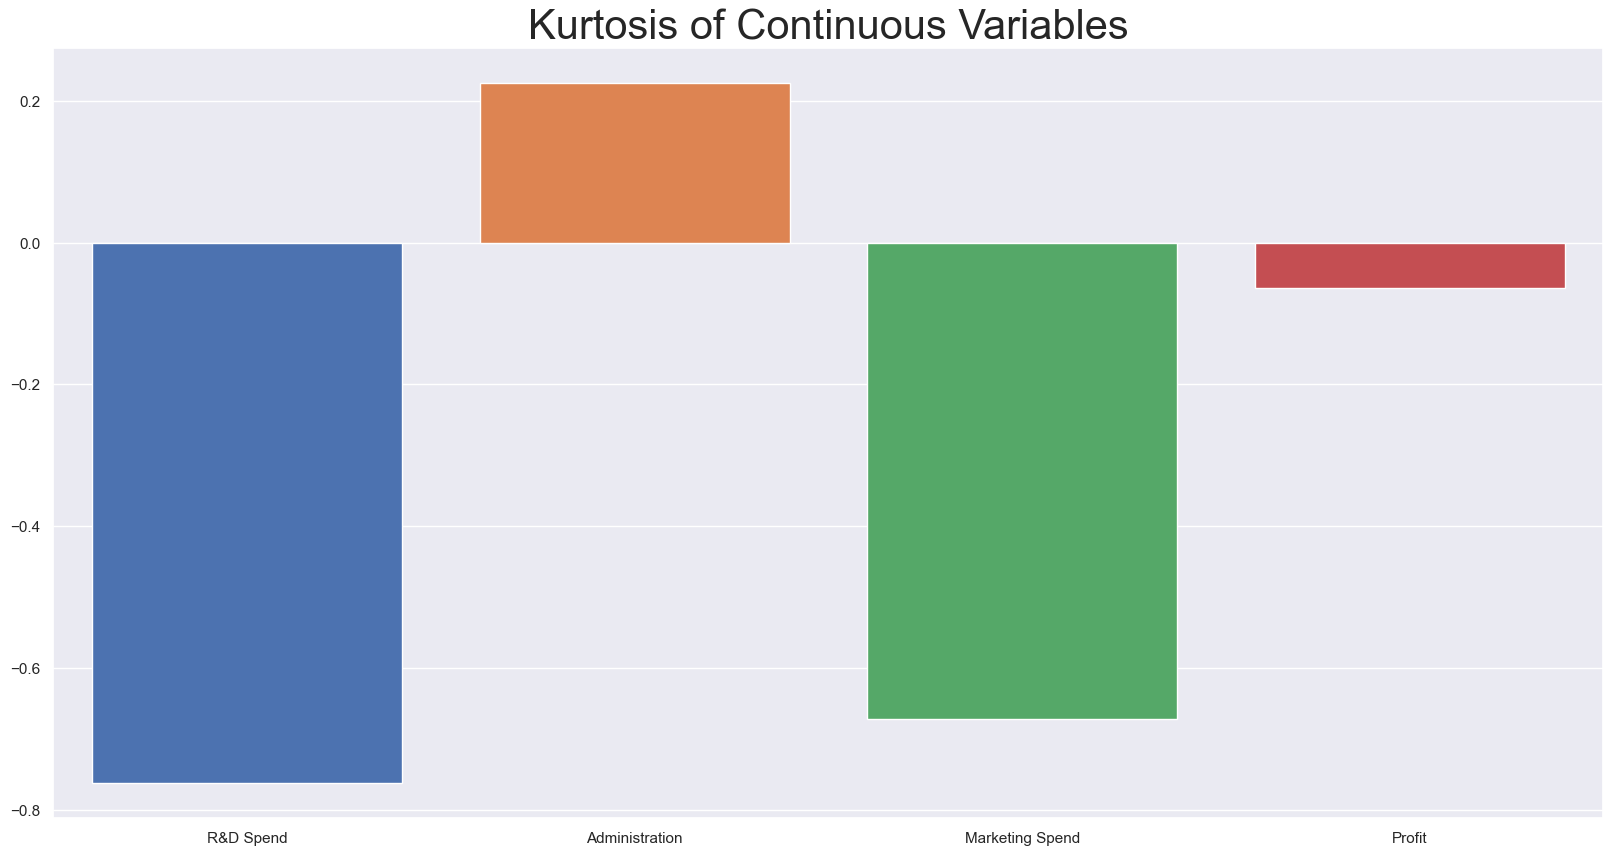

In [63]:
plt.figure(figsize=(20,10))
kurt = {}
for col in data.columns:
    if col!="State":
        kurtosis = data[col].kurt()
        print(f"Kurtosis of {col}: {kurtosis}")
        kurt[col]=kurtosis
sns.barplot(x=list(kurt.keys()), y=list(kurt.values()), saturation=2)
plt.title("Kurtosis of Continuous Variables", fontsize=30)
plt.show()

__Kurtosis is significantly less than 3 for all features.
We could say the distributions have somewhat "light" tails and thus we shouldn't worry about outliers.__

### __3.6 Categorical feature Distribution__

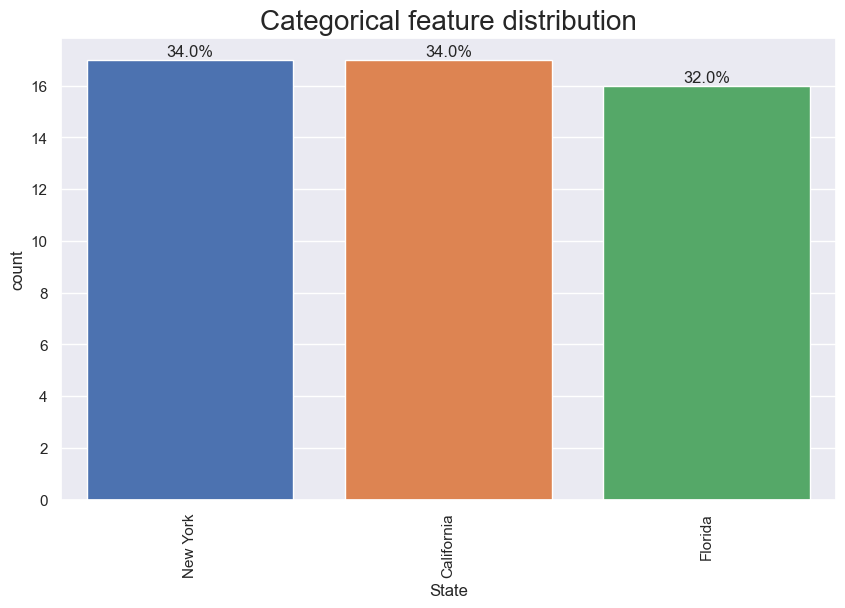

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
total = float(len(data))
ax = sns.countplot(data=data, x='State', saturation=2)
plt.xticks(rotation=90)
plt.title('Categorical feature distribution', size=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

### __3.7 Relationship between Categorical Features and Label__

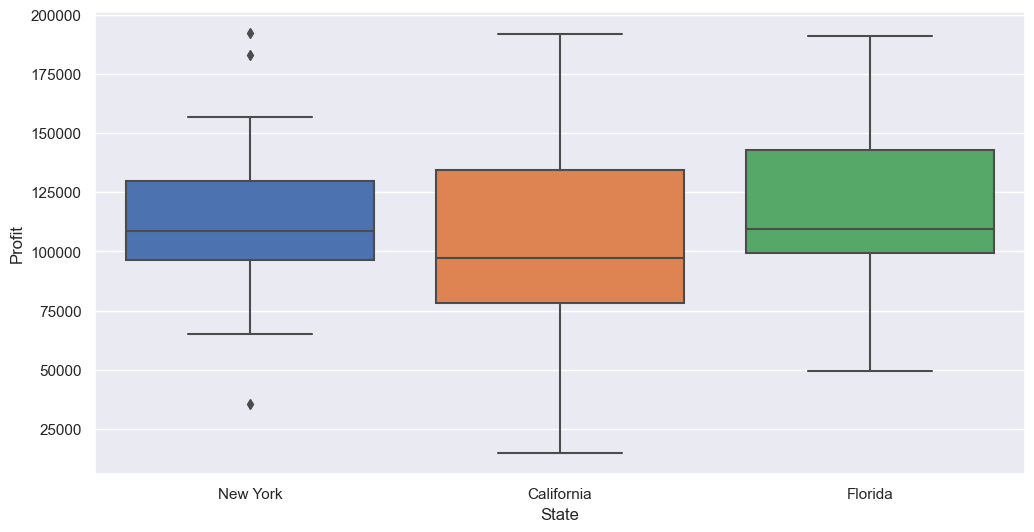

In [48]:
#Find out the relationship between categorical variable and dependent varaible
plt.figure(figsize=(12, 6))
fig = sns.boxplot(
    x='State', 
    y="Profit",
    saturation = 2,
    data=data.sort_values('Profit',ascending=False))
plt.show()

### __3.8 Distribution of continuos variables__

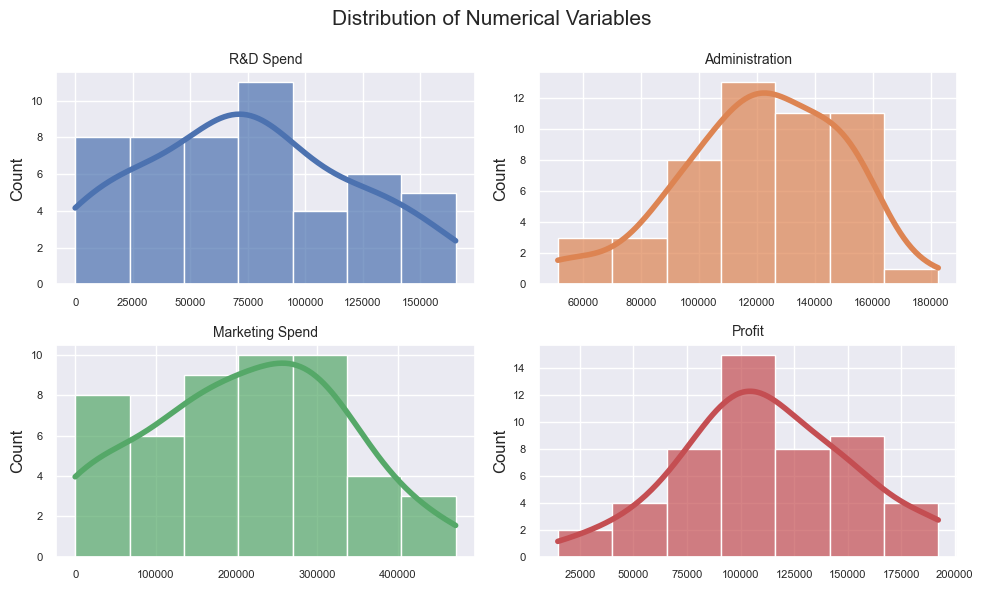

In [68]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes = axes.flat
for index, column in enumerate(numcols):
    graph = sns.histplot(
        data = data,
        x    = column,
        stat = 'count',
        kde  = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        line_kws= {'linewidth': 4},
        alpha   = 0.7,
        ax      = axes[index]
)

    axes[index].set_title(column, fontsize = 10)
    axes[index].tick_params(labelsize = 8)
    axes[index].set_xlabel('')
plt.suptitle('Distribution of Numerical Variables', fontsize=15)
plt.tight_layout()

### __3.9 Target vs Numerical Features__

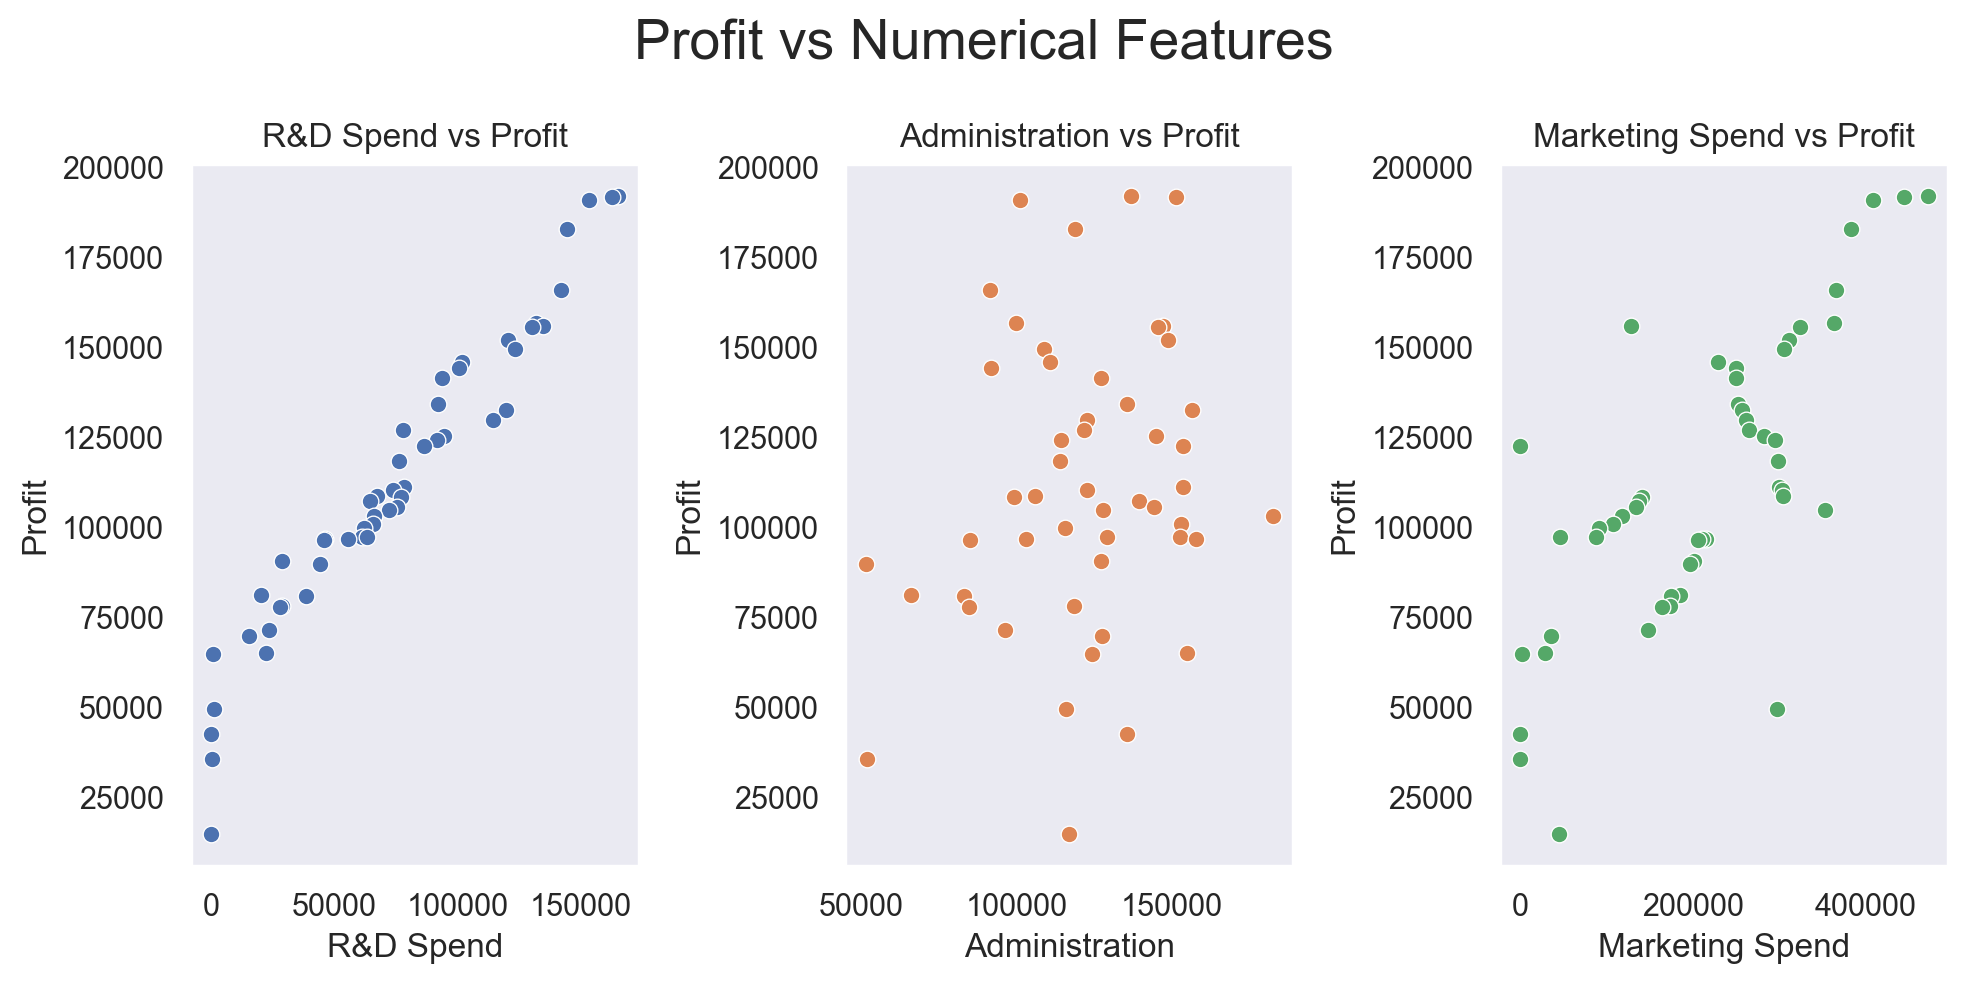

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5), dpi=200)
axes =axes.flat
numfeatures = ['R&D Spend', 'Administration', 'Marketing Spend']
target = 'Profit'
for index, column in enumerate(numfeatures):
    graph = sns.scatterplot(
        x=data[column],
        y=data[target],
        linewidths=0.25,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        ax=axes[index]
)
    axes[index].set_title(f'{column} vs {target}', fontsize=12)
    axes[index].set_xlabel(column, size=12)
    axes[index].set_ylabel(target, size=12)
    axes[index].grid()

plt.suptitle('Profit vs Numerical Features', size=20)
plt.tight_layout()

__R&D Spend and Marketing Spend features linearly progressing with Profit.__

### __3.9 Correlation between numerical features__

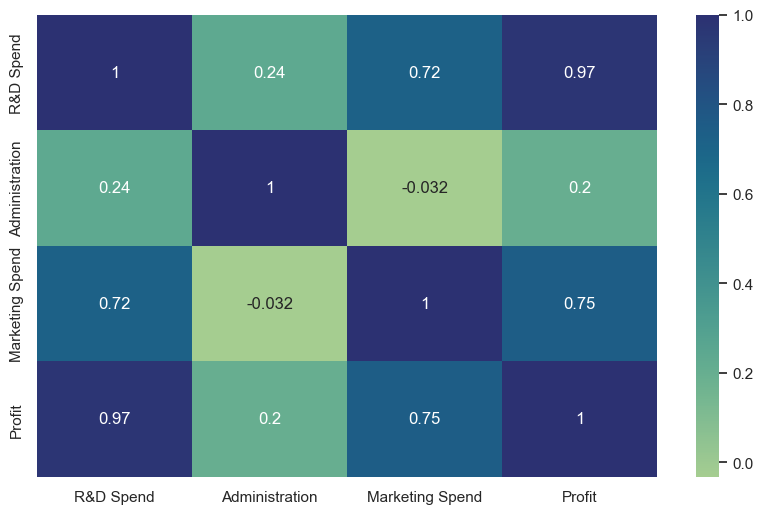

In [71]:
# Checking for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='crest')
plt.show()

__R&D Spend and marketing spend are highly correlated.__

# __4. Feature Engineering__

- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features
- Handle Feature Scalling
- Remove Outliers

__As per Exploratory Data Analysis__
- There is no unwanted column to delete.
- There are no missing values.
- State is the only one categorical feature and it has 3 unique values.
- There are no outliers in the features.

### __4.1 Encoding categorical column__

In [75]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['State'] = encode.fit_transform(data.State.values)

In [76]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


## __5. Build Linear Regression Model__


### __5.1 Determine Features & Target Variables__

In [79]:
X = data.drop(columns='Profit')
y = data.Profit

### __5.2 Split the dataset into Traing and Test sets__

In [80]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=True, train_size=0.8)

In [81]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (40, 4)
xtest shape:  (10, 4)
ytrain shape:  (40,)
ytest shape:  (10,)


### __5.3 Scale data using StandardScaler__

In [93]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
scale.fit(xtrain)
xtrain = scale.transform(xtrain)
xtest = scale.transform(xtest)

### __5.4 Train the Model__

In [94]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(xtrain, ytrain)

LinearRegression()

In [95]:
pd.DataFrame(
    data=np.append(linear_reg.intercept_, linear_reg.coef_),
    index=['Intercept'] + [f"{col} coef." for col in X.columns],
    columns=['Value']
).sort_values('Value', ascending=False)

,Value
Intercept,114437.178609
R&D Spend coef.,45821.207679
Marketing Spend coef.,4884.959218
State coef.,216.449550
Administration coef.,-350.783497


### __5.5 Model Evaluation__

In [96]:
trainacc = linear_reg.score(xtrain, ytrain)
testacc = linear_reg.score(xtest, ytest)

pd.DataFrame([trainacc, testacc], index=['Train Accuracy', 'Test Accuracy'], columns=['Value'])

,Value
Train Accuracy,0.942415
Test Accuracy,0.964983


In [104]:
from sklearn import metrics
def model_evaluation(model, xtest, ytest, model_name):
    ypred = linear_reg.predict(xtest)

    MAE = metrics.mean_absolute_error(ytest, ypred)
    MSE = metrics.mean_squared_error(ytest, ypred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(ytest, ypred)

    return pd.DataFrame(
        [MAE, MSE, RMSE, R2_Score],
        index=['MAE', 'MSE', 'RMSE', 'R2-Score'],
        columns=[model_name],
    )

In [105]:
model_evaluation(linear_reg, xtest, ytest, 'Linear Regression')

,Linear Regression
MAE,7.697664e+03
MSE,7.944789e+07
RMSE,8.913355e+03
R2-Score,9.649828e-01


__The linear regression model obtained R2-score of 96.49%__

In [106]:
ypred = linear_reg.predict(xtest)
df_compare = pd.DataFrame({'Actual':ytest, 'Predicted':ypred}).reset_index(drop=True)
df_compare.head()

,Actual,Predicted
0,105008.31,114928.328817
1,96479.51,90811.495302
2,78239.91,75836.783567
3,81229.06,70449.408676
4,191050.39,179536.022371


In [107]:
def compare_plot(data):
    data.plot(y=['Actual', 'Predicted'], kind='bar', figsize=(10,6), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

Text(0, 0.5, 'Predicted')

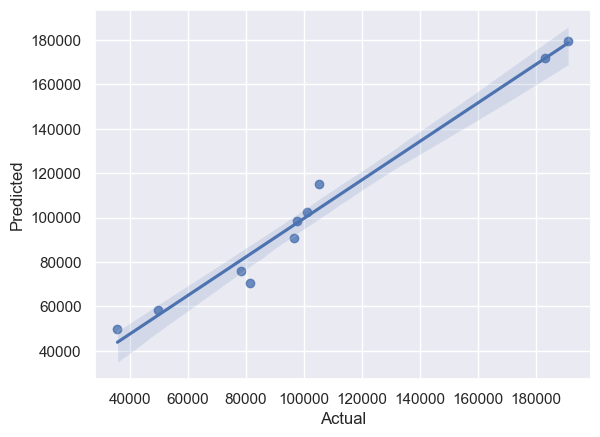

In [108]:
sns.regplot(x=ytest, y=ypred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

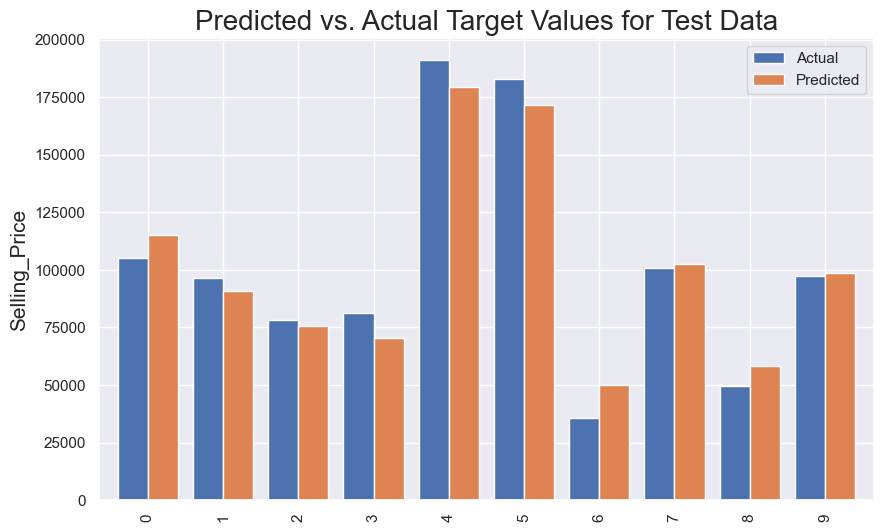

In [109]:
compare_plot(df_compare)


__The difference between the corresponding bars in the above bar plot shows the prediction error of the model on the test data.__

BY Swag